In [66]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors

#%matplotlib widget
%matplotlib inline

## Things to do

1. Look at how AQ is influencing biking

## SDOT Bike Counter Data: 


https://data.seattle.gov/browse?category=Transportation&limitTo=datasets&q=&sortBy=relevance&page=1


# Freemont Bike Data
- operating fom 
2012-10-03 00:00:00 to 2022-09-30 23:00:00	

In [67]:
bike= pd.read_csv("Data/Fremont_Bridge_Bicycle_Counter.csv", sep=',')
bike.Date= pd.to_datetime(bike.Date)
bike.head()

#bike.to_csv('Data/bikef.csv')

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2022-08-01 00:00:00,23.0,7.0,16.0
1,2022-08-01 01:00:00,12.0,5.0,7.0
2,2022-08-01 02:00:00,3.0,0.0,3.0
3,2022-08-01 03:00:00,5.0,2.0,3.0
4,2022-08-01 04:00:00,10.0,2.0,8.0


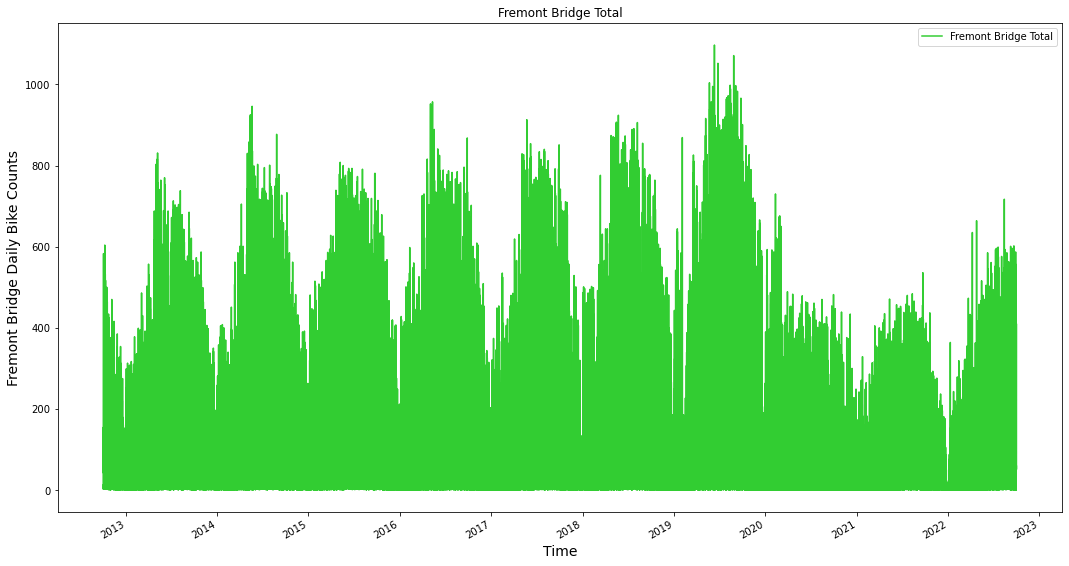

In [120]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Fremont Bridge Total')

bike.plot(x='Date', y='Fremont Bridge Total',color='limegreen', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Fremont Bridge Daily Bike Counts",color='k',fontsize=14);


In [ ]:
print()

In [69]:
print(bike.Date.min())
print(bike.Date.max())

2012-10-03 00:00:00
2022-09-30 23:00:00


# Spokane Street Bridge (West Seattle) 

2014-01-01 00:00:00
2022-09-30 23:00:00

In [70]:
bikess= pd.read_csv("Data/Spokane_St_Bridge_Bicycle_Counter.csv", sep=',')
bikess.Date= pd.to_datetime(bikess.Date)
bikess

#bikess.to_csv('Data/bikess.csv')

,Date,Spokane St. Bridge Total,West,East
0,2020-06-01 00:00:00,2.0,2.0,0.0
1,2020-06-01 01:00:00,1.0,0.0,1.0
2,2020-06-01 02:00:00,2.0,2.0,0.0
3,2020-06-01 03:00:00,1.0,0.0,1.0
4,2020-06-01 04:00:00,3.0,1.0,2.0
...,...,...,...,...
78139,2022-09-30 19:00:00,54.0,7.0,47.0
78140,2022-09-30 20:00:00,27.0,14.0,13.0
78141,2022-09-30 21:00:00,34.0,18.0,16.0
78142,2022-09-30 22:00:00,28.0,6.0,22.0


In [71]:
print(bikess.Date.min())
print(bikess.Date.max())

2014-01-01 00:00:00
2022-09-30 23:00:00


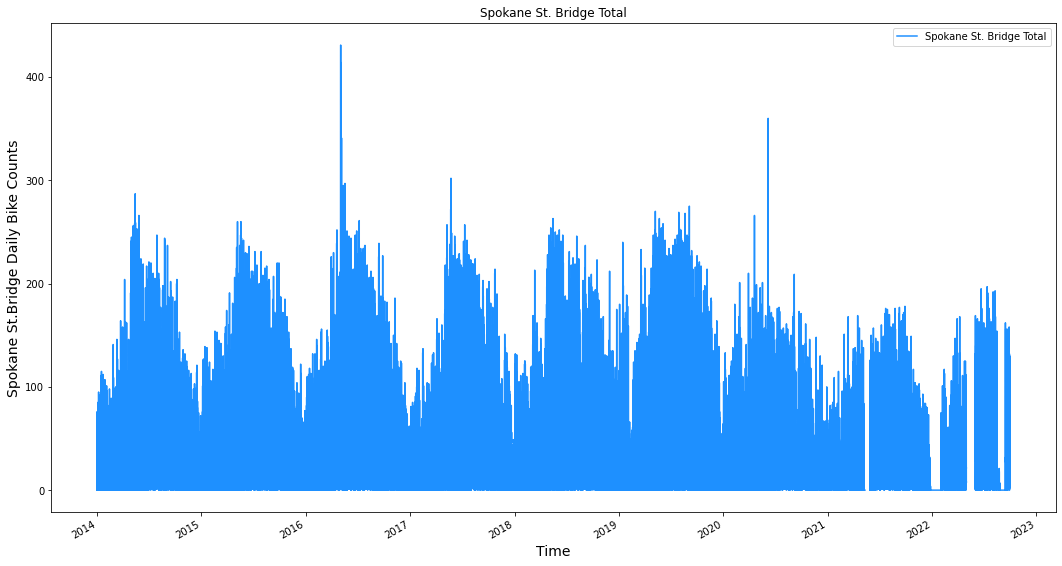

In [119]:
fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Spokane St. Bridge Total')

bikess.plot(x='Date', y='Spokane St. Bridge Total',color='dodgerblue', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Spokane St.Bridge Daily Bike Counts",color='k',fontsize=14);


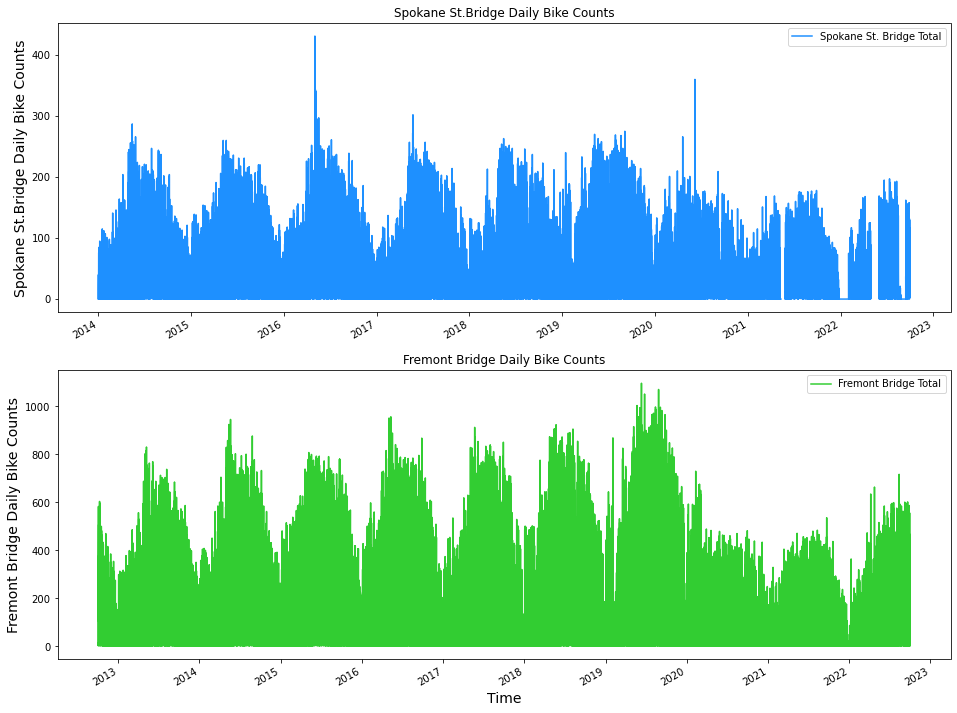

In [134]:

 
fig,(ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,13))

ax.set_title('Spokane St.Bridge Daily Bike Counts')

bikess.plot(x='Date', y='Spokane St. Bridge Total',color='dodgerblue', markerfacecolor='white', ax=ax)

ax.set_xlabel("",fontsize=14)

ax.set_ylabel("Spokane St.Bridge Daily Bike Counts",color='k',fontsize=14);
 
ax1.set_title('Fremont Bridge Daily Bike Counts')

bike.plot(x='Date', y='Fremont Bridge Total',color='limegreen', markerfacecolor='white', ax=ax1)

ax1.set_xlabel("Time",fontsize=14)

ax1.set_ylabel("Fremont Bridge Daily Bike Counts",color='k',fontsize=14);

In [130]:
result =pd.merge(left= bike, right=bikess, on = ['Date'])
result

daily =result.set_index('Date').resample('1D').sum(min_count=24)
daily= daily.reset_index()
daily

monthly =daily.set_index('Date').resample('1M').sum(min_count=27)
monthly= monthly.reset_index()
monthly

yearly =monthly.set_index('Date').resample('1Y').sum(min_count=11)
yearly


#result['time_hour'] = result.Date.dt.hour
#result['time_yr'] = result.Date.dt.year
#result['DOW'] = bikess.Date.dt.dayofweek
#result['time_mn'] = result.Date.dt.month
#result

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East
Date,,,,,,
2014-12-31,1005054.0,514678.0,490376.0,282399.0,137284.0,145115.0
2015-12-31,981207.0,498117.0,483090.0,298816.0,147291.0,151525.0
2016-12-31,982136.0,468134.0,514002.0,297361.0,146093.0,151268.0
2017-12-31,962399.0,412095.0,550304.0,275339.0,135474.0,139865.0
2018-12-31,1049509.0,424456.0,625053.0,291934.0,143828.0,148106.0
2019-12-31,1185678.0,449116.0,736562.0,321298.0,158482.0,162816.0
2020-12-31,771299.0,323302.0,447997.0,285186.0,140575.0,144611.0
2021-12-31,713191.0,294913.0,418278.0,229960.0,115463.0,114497.0
2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
print(daily['Fremont Bridge Total'].mean())
print(daily['Spokane St. Bridge Total'].mean())

2620.0643831271805
787.0742414460942


In [ ]:
# temp

In [138]:
# temp

(1565/ (daily['Fremont Bridge Total'].mean()))*100

59.731356606286624

In [140]:
556/ daily['Spokane St. Bridge Total'].mean()

0.7064136656009213

In [74]:
#daily['time_hour'] = daily.Date.dt.hour
#daily['time_yr'] = daily.Date.dt.year
#daily['DOW'] = daily.Date.dt.dayofweek

daily.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East
0,2014-01-01,914.0,498.0,416.0,246.0,121.0,125.0
1,2014-01-02,1865.0,931.0,934.0,496.0,233.0,263.0
2,2014-01-03,2027.0,1079.0,948.0,510.0,238.0,272.0
3,2014-01-04,1172.0,657.0,515.0,420.0,190.0,230.0
4,2014-01-05,1151.0,665.0,486.0,289.0,144.0,145.0


In [75]:
monthly['time_mn'] = monthly.Date.dt.month
monthly['time_yr'] = monthly.Date.dt.year


monthly.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East,time_mn,time_yr
0,2014-01-31,59873.0,30974.0,28899.0,16249.0,7727.0,8522.0,1,2014
1,2014-02-28,47025.0,24086.0,22939.0,12652.0,6071.0,6581.0,2,2014
2,2014-03-31,62352.0,32202.0,30150.0,17396.0,8487.0,8909.0,3,2014
3,2014-04-30,86855.0,44859.0,41996.0,23891.0,11718.0,12173.0,4,2014
4,2014-05-31,118644.0,61462.0,57182.0,35207.0,17085.0,18122.0,5,2014


In [76]:
yearly= yearly.reset_index()
yearly['time_yr'] = yearly.Date.dt.year

yearly

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East,time_yr
0,2014-12-31,1005054.0,514678.0,490376.0,282399.0,137284.0,145115.0,2014
1,2015-12-31,981207.0,498117.0,483090.0,298816.0,147291.0,151525.0,2015
2,2016-12-31,982136.0,468134.0,514002.0,297361.0,146093.0,151268.0,2016
3,2017-12-31,962399.0,412095.0,550304.0,275339.0,135474.0,139865.0,2017
4,2018-12-31,1049509.0,424456.0,625053.0,291934.0,143828.0,148106.0,2018
5,2019-12-31,1185678.0,449116.0,736562.0,321298.0,158482.0,162816.0,2019
6,2020-12-31,771299.0,323302.0,447997.0,285186.0,140575.0,144611.0,2020
7,2021-12-31,713191.0,294913.0,418278.0,229960.0,115463.0,114497.0,2021
8,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,2022


import matplotlib.pyplot as plt
import seaborn


fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,12))
seaborn.boxplot(x = result.time_hour, 
                y = result['Spokane St. Bridge Total'],
                ax = ax)


ax.set(ylabel='Spokane St. Bridge Hourly Bike Counts',
       xlabel='Hour of Day',
       title='Bike Counts Observed at each hour of day at the Spokane St. Bridge');



seaborn.boxplot(x = result.time_hour, 
                y = result['Fremont Bridge Total'],
                ax = ax1)


ax1.set(ylabel='Fremont Bridge Hourly Bike Counts',
       xlabel='Hour of Day',
       title='Bike Counts Observed at each hour of day at the Fremont Bridge');
#plt.savefig('box_plot_hour.pdf') 

import matplotlib.pyplot as plt
import seaborn


fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,12))
seaborn.boxplot(x = result.time_hour, 
                y = result['East'],
                ax = ax)


ax.set(ylabel='Spokane St. Bridge Hourly Bike Counts going East',
       xlabel='Hour of Day',
       title='East Bike Counts Observed at each hour of day at the Spokane St. Bridge');



seaborn.boxplot(x = result.time_hour, 
                y = result['West'],
                ax = ax1)


ax1.set(ylabel='Spokane St. Bridge Hourly Bike Counts going West',
       xlabel='Hour of Day',
       title='West Bike Counts Observed at each hour of day at the Spokane St. Bridge');
#plt.savefig('box_plot_hour.pdf') 

import matplotlib.pyplot as plt
import seaborn


fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,12))
seaborn.boxplot(x = daily.DOW, 
                y = daily['Spokane St. Bridge Total'],
                ax = ax)


ax.set(ylabel='Spokane St. Bridge Daily Bike Counts',
       xlabel='Day of Week',
       title='Bike Counts Observed Daily at the Spokane St. Bridge');



seaborn.boxplot(x = daily.DOW, 
                y = daily['Fremont Bridge Total'],
                ax = ax1)


ax1.set(ylabel='Fremont Bridge Daily Bike Counts',
       xlabel='Day of Week',
       title='Bike Counts Observed Daily at the Fremont Bridge');
#plt.savefig('box_plot_hour.pdf') 




import matplotlib.pyplot as plt
import seaborn


fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize=(16,12))
seaborn.boxplot(x = monthly.time_mn, 
                y = monthly['Spokane St. Bridge Total'],
                ax = ax)


ax.set(ylabel='Spokane St. Bridge Daily Bike Counts',
       xlabel='Month',
       title='Bike Counts Observed Monthly at the Spokane St. Bridge');



seaborn.boxplot(x = monthly.time_mn, 
                y = monthly['Fremont Bridge Total'],
                ax = ax1)


ax1.set(ylabel='Fremont Bridge Monthly Bike Counts',
       xlabel='Month',
       title='Bike Counts Observed Monthly at the Fremont Bridge');
#plt.savefig('box_plot_hour.pdf') 


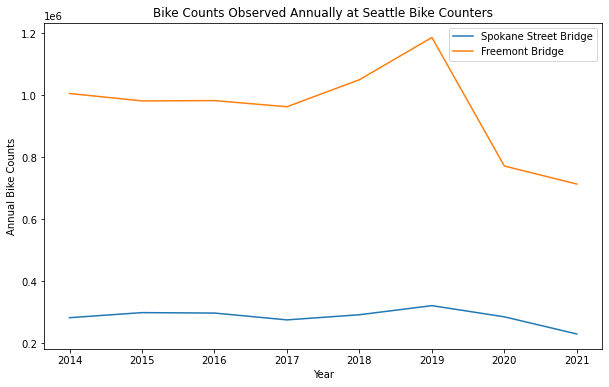

In [77]:
import matplotlib.pyplot as plt
import seaborn


fig, (ax) = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
seaborn.lineplot(x = yearly.time_yr, 
                y = yearly['Spokane St. Bridge Total'],
                ax = ax, label= 'Spokane Street Bridge')



seaborn.lineplot(x = yearly.time_yr, 
                y = yearly['Fremont Bridge Total'],
                ax = ax, label= 'Freemont Bridge')


ax.set(ylabel='Annual Bike Counts',
       xlabel='Year',
       title='Bike Counts Observed Annually at Seattle Bike Counters');
#plt.savefig('box_plot_hour.pdf') 

## Calculate AQI from Concentrations 

- https://github.com/ThangLeQuoc/aqi-calculator
- https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial/notebook

#### Technical DOC from the EPA

- https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf


In [78]:
df= pd.read_csv("Data/AQ_Percip.csv", sep=',')
df.Date =pd.to_datetime(df.Date)
df['DOY'] = df.Date.dt.date

print(df.shape)

print(df.Date.max())
print(result.Date.max())

(167597, 17)
2022-11-14 14:00:00
2022-09-30 23:00:00


In [79]:
df= df.round(decimals=3)

print(df.shape)
df



(167597, 17)


,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s,DOY
0,Seattle 10th & Weller,2015-01-01 00:00:00,699.3,27.86,NaN,NaN,NaN,25.5,NaN,NaN,NaN,32.0,26.0,NaN,NaN,2.8,2015-01-01
1,Seattle 10th & Weller,2015-01-01 10:00:00,572.9,13.06,NaN,NaN,NaN,8.6,NaN,NaN,NaN,34.0,106.0,NaN,NaN,2.9,2015-01-01
2,Seattle 10th & Weller,2015-01-01 11:00:00,738.8,20.25,NaN,NaN,NaN,12.8,NaN,NaN,NaN,37.0,127.0,NaN,NaN,2.9,2015-01-01
3,Seattle 10th & Weller,2015-01-01 12:00:00,1055.1,31.14,NaN,NaN,NaN,19.8,NaN,NaN,NaN,39.0,221.0,NaN,NaN,3.0,2015-01-01
4,Seattle 10th & Weller,2015-01-01 13:00:00,989.5,34.18,NaN,NaN,NaN,16.3,NaN,NaN,NaN,41.0,226.0,NaN,NaN,3.2,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167592,Seattle Beacon Hill,2022-09-09 05:00:00,131.7,NaN,6.90,0.01,4.0,NaN,NaN,0.7,NaN,57.0,25.0,NaN,NaN,NaN,2022-09-09
167593,Seattle Beacon Hill,2022-09-09 06:00:00,148.7,NaN,7.86,0.01,5.0,NaN,NaN,0.8,NaN,57.0,26.0,NaN,NaN,NaN,2022-09-09
167594,Seattle Beacon Hill,2022-09-09 07:00:00,151.5,NaN,8.19,0.01,6.0,NaN,NaN,0.7,NaN,59.0,27.0,NaN,NaN,NaN,2022-09-09
167595,Seattle Beacon Hill,2022-09-09 08:00:00,162.4,NaN,8.07,0.01,4.0,NaN,NaN,0.6,NaN,61.0,30.0,NaN,NaN,NaN,2022-09-09


In [80]:
print(df.CO.min())
print(df.NO2.min())
print(df.NO2_caps.min())
print(df.ozone.min())
print(df['PM2.5_MO'].min())
print(df['PM2.5_FEM'].min())
print(df.RH.min())
print(df.SO2.min())

-500.1
0.0
0.42
0.0
-15.0
-10.0
11.0
-0.7


In [81]:
df.loc[~(df['CO'] > 0), 'CO']=np.nan
df.loc[~(df['NO2'] > 0), 'NO2']=np.nan
df.loc[~(df['NO2_caps'] > 0), 'NO2_caps']=np.nan
df.loc[~(df['ozone'] > 0), 'ozone']=np.nan
df.loc[~(df['PM2.5_MO'] > 0), 'PM2.5_MO']=np.nan
df.loc[~(df['PM2.5_FEM'] > 0), 'PM2.5_FEM']=np.nan
df.loc[~(df['RH'] > 0), 'RH']=np.nan
df.loc[~(df['SO2'] > 0), 'SO2']=np.nan
df.loc[~(df['Temperature'] > 0), 'Temperature']=np.nan
df.loc[~(df['Temperature_10_m'] > 0), 'Temperature_10_m']=np.nan



print(df.CO.min())
print(df.NO2.min())
print(df.NO2_caps.min())
print(df.ozone.min())
print(df['PM2.5_MO'].min())
print(df['PM2.5_FEM'].min())
print(df.RH.min())
print(df.SO2.min())
print(df.Temperature.min())
print(df.Temperature_10_m.min())

0.2
0.02
0.42
0.01
0.2
0.1
11.0
0.1
19.0
8.0


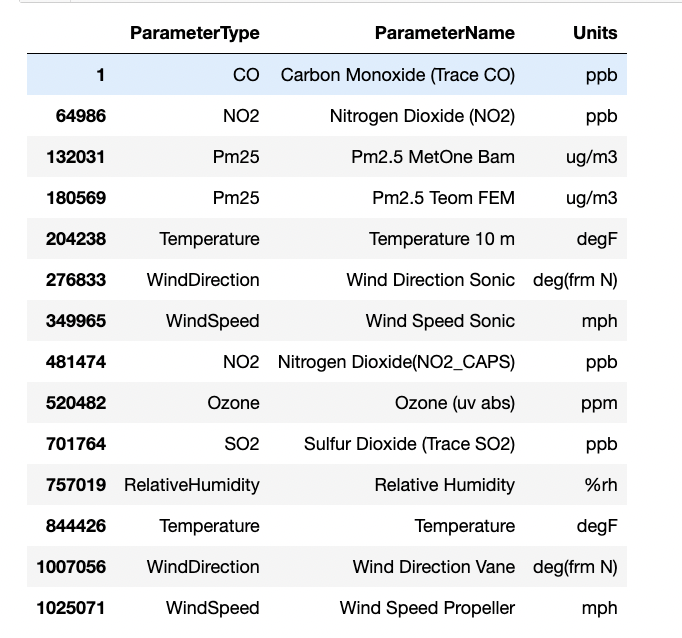

In [82]:
# Make sure Units are Consistent w EPA and my numbers 
df['ozone']= df['ozone']*1000 # in ppb (EPA) 
df['CO']= df['CO']/ 1000 # in ppm (EPA)

# Breakdowns of particulates

- O3 (8 hr, 1 hr)
        ozone CHECK
- PM2.5 (24 hr)
        PM2.5_MO CHECK
        PM2.5_FEM CHECK
- CO (8 hr) 
        CO CHECK
- SO2 (1 hr)
        SO2 CHECK 
- NO2 (1 hr) 
        NO2 CHECK
        NO2_caps CHECK 

In [83]:
list(df.columns)

['Site',
 'Date',
 'CO',
 'NO2',
 'NO2_caps',
 'ozone',
 'PM2.5_MO',
 'PM2.5_FEM',
 'RH',
 'SO2',
 'Temperature',
 'Temperature_10_m',
 'Wind_Direction_s',
 'Wind_Direction_v',
 'Wind_Speed_p',
 'Wind_Speed_s',
 'DOY']

In [87]:
df= df.groupby(['Site']).resample('D', on=('Date')).mean()


KeyError: 'The grouper name Date is not found'

In [90]:
df=df.reset_index()
df

,index,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s
0,0,Seattle 10th & Weller,2014-05-21,NaN,NaN,NaN,NaN,NaN,9.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Seattle 10th & Weller,2014-05-22,NaN,NaN,NaN,NaN,NaN,8.336364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Seattle 10th & Weller,2014-05-23,NaN,NaN,NaN,NaN,NaN,6.591667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Seattle 10th & Weller,2014-05-24,NaN,NaN,NaN,NaN,NaN,5.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Seattle 10th & Weller,2014-05-25,NaN,NaN,NaN,NaN,NaN,6.104167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,7066,Seattle Beacon Hill,2022-11-10,0.303026,NaN,15.200417,13.125000,12.833333,NaN,NaN,0.585714,NaN,41.250000,128.250000,NaN,NaN,NaN
7067,7067,Seattle Beacon Hill,2022-11-11,0.294321,NaN,17.546522,11.052632,9.416667,NaN,NaN,0.409524,NaN,41.833333,183.958333,NaN,NaN,NaN
7068,7068,Seattle Beacon Hill,2022-11-12,0.269487,NaN,12.009167,14.545455,13.000000,NaN,NaN,0.145833,NaN,41.500000,111.416667,NaN,NaN,NaN
7069,7069,Seattle Beacon Hill,2022-11-13,0.289791,NaN,9.567273,15.882353,14.041667,NaN,NaN,0.177273,NaN,41.458333,73.333333,NaN,NaN,NaN


In [91]:
## O3 Sub-Index calculation
def get_03_subindex(x):
    if x <= 54:
        return ((50/54)* x)
    elif x <= 70:
        return ((50/(70- 55))*(x - 55))+ 50 
    elif x <= 85:
        return ((50/(85- 71))*(x - 71))+ 100 
    elif x <= 105:
        return ((50/(105-86 ))*(x - 864))+ 150 
    elif x <= 200:
        return ((100/(200-106 ))*(x - 106))+ 200 
    elif x > 200:
        return 0
    else:
        return 0

df["03_SubIndex"] = df["ozone"].apply(lambda x: get_03_subindex(x))


In [92]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 4.4:
        return ((50/4.4)* x)
    elif x <= 9.4:
        return ((50/(9.4-4.5 ))*(x - 4.5))+ 50 
    elif x <= 12.4:
        return ((50/(12.4-9.5))*(x - 9.5))+ 100 
    elif x <= 15.4:
        return ((50/(15.4- 12.5 ))*(x - 12.5))+ 150 
    elif x <= 30.4:
        return ((100/(30.4- 15.5 ))*(x - 15.5))+ 200 
    elif x <= 40.4:
        return ((100/(40.4- 30.5))*(x - 30.5))+ 300 
    elif x >50.4:
        return ((100/(50.4-40.4))*(x - 40.4))+ 400 
    else:
        return 0

df["CO_SubIndex"] = df["CO"].apply(lambda x: get_CO_subindex(x))

In [93]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 12:
        return ((50/12)* x)
    elif x <= 35.4:
        return (((50/(35.4 - 12.1 ))*(x - 12.1)))+ 50 
    elif x <= 55.4:
        return (((50/(55.4 - 35.5 ))*(x - 35.5)))+ 100 
    elif x <= 150.4:
        return (((50/(150.4- 55.5 ))*(x - 55.5)))+ 150 
    elif x <= 250.4:
        return (((100/(250.4- 150.5 ))*(x - 150.5)))+ 200 
    elif x <= 350.4:
        return (((100/(350.4- 250.5 ))*(x - 250.5)))+ 300 
    elif x >500:
        return (((100/(500- 350.5))*(x - 350.5)))+ 400 
    else:
        return 0

df["PM2.5_1hrMO_SubIndex"] = df["PM2.5_MO"].apply(lambda x: get_PM25_subindex(x))
df["PM2.5_1hrFEM_SubIndex"] = df["PM2.5_FEM"].apply(lambda x: get_PM25_subindex(x))

In [94]:
#df= df.sort_values(by= ['Date'])

#df["Ozone_8hr_avg"] = df.groupby("Site")["ozone"].rolling(window = 8).mean().values
#df["PM2.5_MO_24hr_avg"] = df.groupby("Site")["PM2.5_MO"].rolling(window = 24).mean().values
#df["PM2.5_FEM_24hr_avg"] = df.groupby("Site")["PM2.5_FEM"].rolling(window = 24).mean().values
#df["CO_8hr_avg"] = df.groupby("Site")["CO"].rolling(window = 8).mean().values

#df.head()

In [95]:
print(df['PM2.5_MO'].max())

df['PM2.5_FEM'].max()

179.16666666666666


98.16666666666667

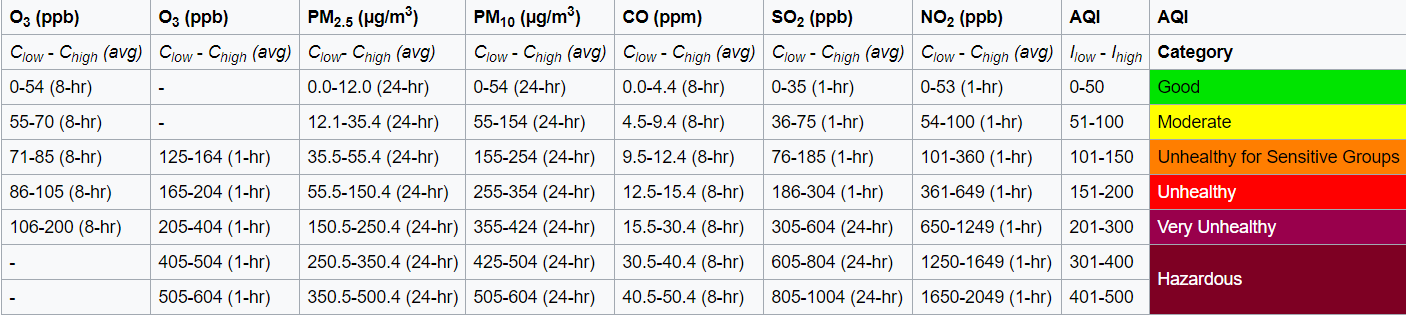

## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 12:
        return ((50/12)* x)
    elif x <= 35.4:
        return (((50/(35.4 - 12.1 ))*(x - 12.1)))+ 50 
    elif x <= 55.4:
        return (((50/(55.4 - 35.5 ))*(x - 35.5)))+ 100 
    elif x <= 150.4:
        return (((50/(150.4- 55.5 ))*(x - 55.5)))+ 150 
    elif x <= 250.4:
        return (((100/(250.4- 150.5 ))*(x - 150.5)))+ 200 
    elif x <= 350.4:
        return (((100/(350.4- 250.5 ))*(x - 250.5)))+ 300 
    elif x >500:
        return (((100/(500- 350.5))*(x - 350.5)))+ 400 
    else:
        return 0

df["PM2.5MO_SubIndex"] = df["PM2.5_MO_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df["PM2.5FEM_SubIndex"] = df["PM2.5_FEM_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
df["PM2.5_1hrMO_SubIndex"] = df["PM2.5_MO"].apply(lambda x: get_PM25_subindex(x))
df["PM2.5_1hrFEM_SubIndex"] = df["PM2.5_FEM"].apply(lambda x: get_PM25_subindex(x))

In [96]:
print(df['PM2.5_MO'].max())
print(df['PM2.5_FEM'].max())

179.16666666666666
98.16666666666667


print(df["PM2.5_MO_24hr_avg"].max())
print(df["PM2.5_FEM_24hr_avg"].max())

In [97]:
#print(df["PM2.5MO_SubIndex"].max())
#print(df["PM2.5FEM_SubIndex"].max())
print(df["PM2.5_1hrMO_SubIndex"].max())
print(df["PM2.5_1hrFEM_SubIndex"].max())

228.69536202869534
172.47980330172112


## O3 Sub-Index calculation
def get_03_subindex(x):
    if x <= 54:
        return ((50/54)* x)
    elif x <= 70:
        return ((50/(70- 55))*(x - 55))+ 50 
    elif x <= 85:
        return ((50/(85- 71))*(x - 71))+ 100 
    elif x <= 105:
        return ((50/(105-86 ))*(x - 864))+ 150 
    elif x <= 200:
        return ((100/(200-106 ))*(x - 106))+ 200 
    elif x > 200:
        return 0
    else:
        return 0

df["03_SubIndex"] = df["Ozone_8hr_avg"].apply(lambda x: get_03_subindex(x))



In [98]:
print(df["ozone"].max())
#print(df["Ozone_8hr_avg"].max())
print(df["03_SubIndex"].max())

52.142857142857146
48.280423280423285


## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 4.4:
        return ((50/4.4)* x)
    elif x <= 9.4:
        return ((50/(9.4-4.5 ))*(x - 4.5))+ 50 
    elif x <= 12.4:
        return ((50/(12.4-9.5))*(x - 9.5))+ 100 
    elif x <= 15.4:
        return ((50/(15.4- 12.5 ))*(x - 12.5))+ 150 
    elif x <= 30.4:
        return ((100/(30.4- 15.5 ))*(x - 15.5))+ 200 
    elif x <= 40.4:
        return ((100/(40.4- 30.5))*(x - 30.5))+ 300 
    elif x >50.4:
        return ((100/(50.4-40.4))*(x - 40.4))+ 400 
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_avg"].apply(lambda x: get_CO_subindex(x))



In [99]:
print(df["CO"].max())
#print(df["CO_8hr_avg"].max())
print(df["CO_SubIndex"].max())

1.6264500000000002
18.482386363636365


In [100]:
#SO2 Subindex 

def get_SO2_subindex(x):
    if x <= 35:
        return ((50/35)* x)
    elif x <= 75:
        return ((50/(75-36))*(x - 36))+ 50 
    elif x <= 185:
        return (((50/(185-76))*(x - 76)))+ 100 
    elif x <= 304:
        return ((50/(304-186))*(x - 186))+ 150 
    elif x <= 604:
        return ((100/(604-305))*(x - 305))+ 200 
    elif x <= 804:
        return ((100/(804-605))*(x - 605))+ 300 
    elif x >1004:
        return ((100/(1004-805))*(x - 805))+ 400 
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].apply(lambda x: get_SO2_subindex(x))


In [101]:
print(df["SO2"].max())
print(df["SO2_SubIndex"].max())

5.8625
8.375


In [102]:
#NO2 Subindex 

def get_NO2_subindex(x):
    if x <= 53:
        return ((50/53)* x)
    elif x <= 100:
        return ((50/(100-54))*(x - 54))+ 50 
    elif x <= 360:
        return (((50/(360-101))*(x - 101)))+ 100 
    elif x <= 649:
        return ((50/(649-361))*(x - 361))+ 150 
    elif x <= 1249:
        return ((100/(1249-650))*(x - 650))+ 200 
    elif x <= 1649:
        return ((100/(1649-1250))*(x - 1250))+ 300 
    elif x >2049:
        return ((100/(2049-1650))*(x - 1650))+ 400 
    else:
        return 0

df["NO2_SubIndex"] = df["NO2"].apply(lambda x: get_NO2_subindex(x))
df["NO2_CAPS_SubIndex"] = df["NO2_caps"].apply(lambda x: get_NO2_subindex(x))



In [103]:
print(df["NO2"].max())
print(df["NO2_SubIndex"].max())

59.28173913043479
55.74102079395085


In [104]:
print(df["NO2_caps"].max())
print(df["NO2_CAPS_SubIndex"].max())

42.03608695652174
39.65668580803938


In [105]:
list(df.columns)

['index',
 'Site',
 'Date',
 'CO',
 'NO2',
 'NO2_caps',
 'ozone',
 'PM2.5_MO',
 'PM2.5_FEM',
 'RH',
 'SO2',
 'Temperature',
 'Temperature_10_m',
 'Wind_Direction_s',
 'Wind_Direction_v',
 'Wind_Speed_p',
 'Wind_Speed_s',
 '03_SubIndex',
 'CO_SubIndex',
 'PM2.5_1hrMO_SubIndex',
 'PM2.5_1hrFEM_SubIndex',
 'SO2_SubIndex',
 'NO2_SubIndex',
 'NO2_CAPS_SubIndex']

In [106]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [107]:
#df["AQI_calculated"] = round(df[["PM2.5MO_SubIndex", "PM2.5FEM_SubIndex", "03_SubIndex", "CO_SubIndex",'SO2_SubIndex',
#                                 "NO2_SubIndex", "NO2_CAPS_SubIndex", 'PM2.5_1hrMO_SubIndex', 'PM2.5_1hrFEM_SubIndex']].max(axis = 1))

#df["AQI_calculated"] = round(df[["PM2.5MO_SubIndex", "PM2.5FEM_SubIndex", "03_SubIndex", "CO_SubIndex",'SO2_SubIndex',
#                                 "NO2_SubIndex", "NO2_CAPS_SubIndex"]].max(axis = 1))

df["AQI_calculated"] = round(df[['PM2.5_1hrMO_SubIndex',
 'PM2.5_1hrFEM_SubIndex',
 '03_SubIndex',
 'CO_SubIndex',
 'SO2_SubIndex',
 'NO2_SubIndex',
 'NO2_CAPS_SubIndex']].max(axis = 1))



df["AQI_calculated_where"] = df[['PM2.5_1hrMO_SubIndex',
 'PM2.5_1hrFEM_SubIndex',
 '03_SubIndex',
 'CO_SubIndex',
 'SO2_SubIndex',
 'NO2_SubIndex',
 'NO2_CAPS_SubIndex']].idxmax(axis=1)

df['AQI_Cause'] = df['AQI_calculated_where'].map({'PM2.5_1hrMO_SubIndex': 'PM2.5', 'PM2.5_1hrFEM_SubIndex': 'PM2.5',
                                                                "03_SubIndex": 'O3', "CO_SubIndex": "CO", 'SO2_SubIndex':'SO2', 
                                                                   "NO2_SubIndex": "NO2","NO2_CAPS_SubIndex": "NO2" })
df

,index,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,03_SubIndex,CO_SubIndex,PM2.5_1hrMO_SubIndex,PM2.5_1hrFEM_SubIndex,SO2_SubIndex,NO2_SubIndex,NO2_CAPS_SubIndex,AQI_calculated,AQI_calculated_where,AQI_Cause
0,0,Seattle 10th & Weller,2014-05-21,NaN,NaN,NaN,NaN,NaN,9.100000,NaN,...,0.000000,0.000000,0.000000,37.916667,0.000000,0.0,0.000000,38.0,PM2.5_1hrFEM_SubIndex,PM2.5
1,1,Seattle 10th & Weller,2014-05-22,NaN,NaN,NaN,NaN,NaN,8.336364,NaN,...,0.000000,0.000000,0.000000,34.734848,0.000000,0.0,0.000000,35.0,PM2.5_1hrFEM_SubIndex,PM2.5
2,2,Seattle 10th & Weller,2014-05-23,NaN,NaN,NaN,NaN,NaN,6.591667,NaN,...,0.000000,0.000000,0.000000,27.465278,0.000000,0.0,0.000000,27.0,PM2.5_1hrFEM_SubIndex,PM2.5
3,3,Seattle 10th & Weller,2014-05-24,NaN,NaN,NaN,NaN,NaN,5.625000,NaN,...,0.000000,0.000000,0.000000,23.437500,0.000000,0.0,0.000000,23.0,PM2.5_1hrFEM_SubIndex,PM2.5
4,4,Seattle 10th & Weller,2014-05-25,NaN,NaN,NaN,NaN,NaN,6.104167,NaN,...,0.000000,0.000000,0.000000,25.434028,0.000000,0.0,0.000000,25.0,PM2.5_1hrFEM_SubIndex,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,7066,Seattle Beacon Hill,2022-11-10,0.303026,NaN,15.200417,13.125000,12.833333,NaN,NaN,...,12.152778,3.443478,51.573677,0.000000,0.836735,0.0,14.340016,52.0,PM2.5_1hrMO_SubIndex,PM2.5
7067,7067,Seattle Beacon Hill,2022-11-11,0.294321,NaN,17.546522,11.052632,9.416667,NaN,NaN,...,10.233918,3.344555,39.236111,0.000000,0.585034,0.0,16.553322,39.0,PM2.5_1hrMO_SubIndex,PM2.5
7068,7068,Seattle Beacon Hill,2022-11-12,0.269487,NaN,12.009167,14.545455,13.000000,NaN,NaN,...,13.468013,3.062358,51.931330,0.000000,0.208333,0.0,11.329403,52.0,PM2.5_1hrMO_SubIndex,PM2.5
7069,7069,Seattle Beacon Hill,2022-11-13,0.289791,NaN,9.567273,15.882353,14.041667,NaN,NaN,...,14.705882,3.293083,54.166667,0.000000,0.253247,0.0,9.025729,54.0,PM2.5_1hrMO_SubIndex,PM2.5


In [108]:
df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

#df#

Good            6441
Satisfactory     571
Moderate          53
Poor               6
Name: AQI_bucket_calculated, dtype: int64

In [109]:
mask = df[df['AQI_calculated'] >= 170]
mask
#mask.to_csv('mask.csv')

,index,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,CO_SubIndex,PM2.5_1hrMO_SubIndex,PM2.5_1hrFEM_SubIndex,SO2_SubIndex,NO2_SubIndex,NO2_CAPS_SubIndex,AQI_calculated,AQI_calculated_where,AQI_Cause,AQI_bucket_calculated
1553,1553,Seattle 10th & Weller,2018-08-21,1.337638,57.387500,NaN,NaN,102.208333,NaN,NaN,...,15.200433,174.609238,0.000000,0.000000,53.682065,0.000000,175.0,PM2.5_1hrMO_SubIndex,PM2.5,Moderate
1554,1554,Seattle 10th & Weller,2018-08-22,1.092091,59.281739,NaN,NaN,95.625000,NaN,NaN,...,12.410128,171.140674,0.000000,0.000000,55.741021,0.000000,171.0,PM2.5_1hrMO_SubIndex,PM2.5,Moderate
2305,2305,Seattle 10th & Weller,2020-09-11,1.335046,27.969583,NaN,NaN,131.333333,NaN,NaN,...,15.170975,189.954338,0.000000,0.000000,26.386399,0.000000,190.0,PM2.5_1hrMO_SubIndex,PM2.5,Moderate
2306,2306,Seattle 10th & Weller,2020-09-12,1.305252,19.679565,NaN,NaN,145.625000,NaN,NaN,...,14.832411,197.484194,0.000000,0.000000,18.565628,0.000000,197.0,PM2.5_1hrMO_SubIndex,PM2.5,Moderate
2307,2307,Seattle 10th & Weller,2020-09-13,NaN,28.914583,NaN,NaN,156.916667,NaN,NaN,...,0.000000,206.423090,0.000000,0.000000,27.277909,0.000000,206.0,PM2.5_1hrMO_SubIndex,PM2.5,Poor
2308,2308,Seattle 10th & Weller,2020-09-14,1.486258,37.487083,NaN,NaN,179.000000,NaN,NaN,...,16.889299,228.528529,0.000000,0.000000,35.365173,0.000000,229.0,PM2.5_1hrMO_SubIndex,PM2.5,Poor
2309,2309,Seattle 10th & Weller,2020-09-15,1.480338,38.029583,NaN,NaN,177.791667,NaN,NaN,...,16.822017,227.318986,0.000000,0.000000,35.876965,0.000000,227.0,PM2.5_1hrMO_SubIndex,PM2.5,Poor
2310,2310,Seattle 10th & Weller,2020-09-16,0.951987,25.657917,NaN,NaN,101.125000,NaN,NaN,...,10.818040,174.038462,0.000000,0.000000,24.205582,0.000000,174.0,PM2.5_1hrMO_SubIndex,PM2.5,Moderate
3073,3073,Seattle 10th & Weller,2022-10-19,1.042091,35.931250,NaN,NaN,101.666667,NaN,NaN,...,11.841947,174.323850,0.000000,0.000000,33.897406,0.000000,174.0,PM2.5_1hrMO_SubIndex,PM2.5,Moderate
3074,3074,Seattle 10th & Weller,2022-10-20,1.204557,32.900000,NaN,NaN,108.083333,NaN,NaN,...,13.688142,177.704601,0.000000,0.000000,31.037736,0.000000,178.0,PM2.5_1hrMO_SubIndex,PM2.5,Moderate


In [110]:
#percipD.precip_accum_one_hour_set_1.nlargest(15)

In [111]:
percip= pd.read_csv("Data/percip2.csv", sep=',')
percip.Date =pd.to_datetime(percip.Date)

percip.head()
percip.shape

percipD= percip.resample('D', on='Date').sum()
percipD= percipD.reset_index()
percipD


#df5 = pd.merge(df, percip, how="left", on=["Date"])
#df5.shape
#df3 = pd.merge(df5, result, how="left", on=["Date"])

,Date,precip_accum_one_hour_set_1
0,2010-10-26,3.575000
1,2010-10-27,0.370000
2,2010-10-28,1.970000
3,2010-10-29,0.460000
4,2010-10-30,5.101667
...,...,...
4395,2022-11-07,5.486967
4396,2022-11-08,2.496250
4397,2022-11-09,0.000000
4398,2022-11-10,0.000000


In [112]:
daily_AQI= pd.merge(df, daily, how="left", on=["Date"])

daily_AQI_P= pd.merge(daily_AQI, percipD, how="left", on=["Date"])
daily_AQI_P



,index,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,AQI_calculated_where,AQI_Cause,AQI_bucket_calculated,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East,precip_accum_one_hour_set_1
0,0,Seattle 10th & Weller,2014-05-21,NaN,NaN,NaN,NaN,NaN,9.100000,NaN,...,PM2.5_1hrFEM_SubIndex,PM2.5,Good,5229.0,2666.0,2563.0,1518.0,729.0,789.0,0.00
1,1,Seattle 10th & Weller,2014-05-22,NaN,NaN,NaN,NaN,NaN,8.336364,NaN,...,PM2.5_1hrFEM_SubIndex,PM2.5,Good,4910.0,2473.0,2437.0,1551.0,756.0,795.0,0.00
2,2,Seattle 10th & Weller,2014-05-23,NaN,NaN,NaN,NaN,NaN,6.591667,NaN,...,PM2.5_1hrFEM_SubIndex,PM2.5,Good,2556.0,1308.0,1248.0,751.0,359.0,392.0,3.14
3,3,Seattle 10th & Weller,2014-05-24,NaN,NaN,NaN,NaN,NaN,5.625000,NaN,...,PM2.5_1hrFEM_SubIndex,PM2.5,Good,2155.0,1124.0,1031.0,654.0,336.0,318.0,0.00
4,4,Seattle 10th & Weller,2014-05-25,NaN,NaN,NaN,NaN,NaN,6.104167,NaN,...,PM2.5_1hrFEM_SubIndex,PM2.5,Good,1234.0,670.0,564.0,366.0,186.0,180.0,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,7066,Seattle Beacon Hill,2022-11-10,0.303026,NaN,15.200417,13.125000,12.833333,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Satisfactory,NaN,NaN,NaN,NaN,NaN,NaN,0.00
7067,7067,Seattle Beacon Hill,2022-11-11,0.294321,NaN,17.546522,11.052632,9.416667,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Good,NaN,NaN,NaN,NaN,NaN,NaN,0.06
7068,7068,Seattle Beacon Hill,2022-11-12,0.269487,NaN,12.009167,14.545455,13.000000,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Satisfactory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7069,7069,Seattle Beacon Hill,2022-11-13,0.289791,NaN,9.567273,15.882353,14.041667,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Satisfactory,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
list(daily_AQI_P.columns)

['index',
 'Site',
 'Date',
 'CO',
 'NO2',
 'NO2_caps',
 'ozone',
 'PM2.5_MO',
 'PM2.5_FEM',
 'RH',
 'SO2',
 'Temperature',
 'Temperature_10_m',
 'Wind_Direction_s',
 'Wind_Direction_v',
 'Wind_Speed_p',
 'Wind_Speed_s',
 '03_SubIndex',
 'CO_SubIndex',
 'PM2.5_1hrMO_SubIndex',
 'PM2.5_1hrFEM_SubIndex',
 'SO2_SubIndex',
 'NO2_SubIndex',
 'NO2_CAPS_SubIndex',
 'AQI_calculated',
 'AQI_calculated_where',
 'AQI_Cause',
 'AQI_bucket_calculated',
 'Fremont Bridge Total',
 'Fremont Bridge East Sidewalk',
 'Fremont Bridge West Sidewalk',
 'Spokane St. Bridge Total',
 'West',
 'East',
 'precip_accum_one_hour_set_1']

# Make a daily DF

#dfD= df.groupby(['Site']).resample('D', on=('Date')).mean()
#dfD= dfD.reset_index()
#daily_AQI= pd.merge(dfD, daily, how="left", on=["Date"])
#daily_AQI

#percipD= percip.resample('D', on='Date').sum()
#percipD= percipD.reset_index()
#percipD


#daily_AQI_P= pd.merge(daily_AQI, percipD, how="left", on=["Date"])

#daily_AQI_P["AQI_bucket_calculated"] = daily_AQI_P["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
#daily_AQI_P["AQI_calculated_where"] = daily_AQI_P[["PM2.5MO_SubIndex", "PM2.5FEM_SubIndex", "03_SubIndex", "CO_SubIndex",'SO2_SubIndex',
#                                 "NO2_SubIndex", "NO2_CAPS_SubIndex"]].idxmax(axis=1)


#print(daily_AQI_P[~daily_AQI_P.AQI_calculated.isna()].AQI_bucket_calculated.value_counts())

3daily_AQI_P

#d#aily_AQI_P = daily_AQI_P[daily_AQI_P['AQI_calculated'].notna()]
#daily_AQI_P.describe() 
##daily_AQI_P.to_csv('Data/Daily_Bike_AQI_Weather.csv')
#list(daily_AQI_P.columns)


#daily_AQI_P['AQI_Cause'] = daily_AQI_P['AQI_calculated_where'].map({'PM2.5MO_SubIndex': 'PM2.5', 'PM2.5FEM_SubIndex': 'PM2.5',
                                                                "03_SubIndex": 'O3', "CO_SubIndex": "CO", 'SO2_SubIndex':'SO2', 
                                                                 "NO2_SubIndex": "NO2","NO2_CAPS_SubIndex": "NO2" })
#daily_AQI_P
#daily_AQI_P.to_csv('Data/Daily_Bike_AQI_Weather.csv')

In [114]:
mask = daily_AQI_P[daily_AQI_P['AQI_bucket_calculated'] == 'Poor']
mask

,index,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,AQI_calculated_where,AQI_Cause,AQI_bucket_calculated,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East,precip_accum_one_hour_set_1
2307,2307,Seattle 10th & Weller,2020-09-13,NaN,28.914583,NaN,NaN,156.916667,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Poor,374.0,176.0,198.0,122.0,64.0,58.0,0.0
2308,2308,Seattle 10th & Weller,2020-09-14,1.486258,37.487083,NaN,NaN,179.000000,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Poor,564.0,204.0,360.0,375.0,185.0,190.0,0.0
2309,2309,Seattle 10th & Weller,2020-09-15,1.480338,38.029583,NaN,NaN,177.791667,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Poor,646.0,240.0,406.0,395.0,197.0,198.0,0.0
6278,6278,Seattle Beacon Hill,2020-09-13,1.519279,NaN,22.243750,11.818182,152.708333,NaN,88.125000,...,PM2.5_1hrMO_SubIndex,PM2.5,Poor,374.0,176.0,198.0,122.0,64.0,58.0,0.0
6279,6279,Seattle Beacon Hill,2020-09-14,1.563842,NaN,29.633478,18.888889,179.166667,NaN,83.541667,...,PM2.5_1hrMO_SubIndex,PM2.5,Poor,564.0,204.0,360.0,375.0,185.0,190.0,0.0
6280,6280,Seattle Beacon Hill,2020-09-15,1.626450,NaN,22.070417,22.380952,170.666667,NaN,82.166667,...,PM2.5_1hrMO_SubIndex,PM2.5,Poor,646.0,240.0,406.0,395.0,197.0,198.0,0.0


In [115]:
list(daily_AQI_P.columns.unique())

['index',
 'Site',
 'Date',
 'CO',
 'NO2',
 'NO2_caps',
 'ozone',
 'PM2.5_MO',
 'PM2.5_FEM',
 'RH',
 'SO2',
 'Temperature',
 'Temperature_10_m',
 'Wind_Direction_s',
 'Wind_Direction_v',
 'Wind_Speed_p',
 'Wind_Speed_s',
 '03_SubIndex',
 'CO_SubIndex',
 'PM2.5_1hrMO_SubIndex',
 'PM2.5_1hrFEM_SubIndex',
 'SO2_SubIndex',
 'NO2_SubIndex',
 'NO2_CAPS_SubIndex',
 'AQI_calculated',
 'AQI_calculated_where',
 'AQI_Cause',
 'AQI_bucket_calculated',
 'Fremont Bridge Total',
 'Fremont Bridge East Sidewalk',
 'Fremont Bridge West Sidewalk',
 'Spokane St. Bridge Total',
 'West',
 'East',
 'precip_accum_one_hour_set_1']

In [116]:
# Hourly

# Dates

August 2017, Sep 2017, August 18, September 20, October 22 



In [117]:
daily_AQI_P.tail()

,index,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,...,AQI_calculated_where,AQI_Cause,AQI_bucket_calculated,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Spokane St. Bridge Total,West,East,precip_accum_one_hour_set_1
7066,7066,Seattle Beacon Hill,2022-11-10,0.303026,NaN,15.200417,13.125000,12.833333,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Satisfactory,NaN,NaN,NaN,NaN,NaN,NaN,0.00
7067,7067,Seattle Beacon Hill,2022-11-11,0.294321,NaN,17.546522,11.052632,9.416667,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Good,NaN,NaN,NaN,NaN,NaN,NaN,0.06
7068,7068,Seattle Beacon Hill,2022-11-12,0.269487,NaN,12.009167,14.545455,13.000000,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Satisfactory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7069,7069,Seattle Beacon Hill,2022-11-13,0.289791,NaN,9.567273,15.882353,14.041667,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Satisfactory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7070,7070,Seattle Beacon Hill,2022-11-14,0.211247,NaN,7.787857,11.333333,10.866667,NaN,NaN,...,PM2.5_1hrMO_SubIndex,PM2.5,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
#daily_AQI_P.to_csv('hourly_corrected.csv')

In [ ]:
list(daily_AQI_P.columns)

#aqD= pd.read_csv("Data/Dec13Daily.csv", sep=',')
aqD.Date= pd.to_datetime(aqD.Date)
aqD=aqD.set_index('Date')
aqD= aqD.sort_index()

freeD = aqD[aqD['Site'] == 'Seattle 10th & Weller']
freeD.head()

list(freeD.columns)


ssD = aqD[aqD['Site'] == 'Seattle Beacon Hill']
ssD.head()

list(ssD.columns)

In [ ]:
freeD2= freeD[[ 'Temperature_10_m', 'precip_accum_one_hour_set_1', 'mPM','Fremont.Bridge.Total', 'AQI_calculated' ]].dropna()
freeD2


ssD2= ssD[[ 'Temperature_10_m', 'precip_accum_one_hour_set_1', 'mPM','Spokane.St..Bridge.Total', 'AQI_calculated' ]].dropna()
ssD2

In [ ]:
from sklearn.linear_model import LinearRegression

columns = ['Temperature_10_m', 'precip_accum_one_hour_set_1', 'mPM']

X = freeD2[columns]
y = freeD2['Fremont.Bridge.Total']
clf = LinearRegression().fit(X, y)
freeD2['overall_trend_p&t&pm'] = clf.predict(X)

# Plot the overall trend
freeD2[['Fremont.Bridge.Total', 'overall_trend_p&t&pm']].plot()
plt.ylabel('Daily bicycle traffic');

In [ ]:
freeD2['overall_corrected'] = freeD2['Fremont.Bridge.Total'] - freeD2['overall_trend_p&t&pm'] + freeD2['overall_trend_p&t&pm'].mean()
print("rms = {0:.0f}".format(np.std(freeD2['overall_corrected'])))
freeD2['overall_corrected'].plot()
plt.ylabel('corrected daily bicycle traffic fremont bridge');



In [ ]:
vy = np.sum((y - freeD2['overall_corrected']) ** 2) / len(y)
X2 = np.hstack([X, np.ones((X.shape[0], 1))])
C = vy * np.linalg.inv(np.dot(X2.T, X2))
var = C.diagonal()

In [ ]:
ind = columns.index('precip_accum_one_hour_set_1')
slope = clf.coef_[ind]
error = np.sqrt(var[ind])
print("{0:.0f} +/- {1:.0f} daily crossings lost per inch of rain".format(-slope* 25.4, error* 25.4))

In [ ]:
ind = columns.index('Temperature_10_m')
slope = clf.coef_[ind]
error = np.sqrt(var[ind])
print("{0:.0f} +/- {1:.0f} daily crossings riders per 10 degrees Fahrenheit".format(10 * slope, 10 * error))

In [ ]:
ind = columns.index('mPM')
slope = clf.coef_[ind]
error = np.sqrt(var[ind])
print("{0:.0f} +/- {1:.0f} daily crossings lost per 10 \u03BCg PM 2.5".format(-10 * slope, 10 * error))

In [ ]:
freeD2.reset_index()
#freeD2.to_csv('Data/freeD2.csv')

In [ ]:
ssD2

In [ ]:
from sklearn.linear_model import LinearRegression

#columns = ['Temperature_10_m', 'precip_accum_one_hour_set_1']
columns = ['Temperature_10_m', 'precip_accum_one_hour_set_1', 'mPM']

X = ssD2[columns]
y = ssD2['Spokane.St..Bridge.Total']
clf2 = LinearRegression().fit(X, y)
clfSPM = LinearRegression().fit(X, y)
ssD2['overall_trend_p&t&PM'] = clf2.predict(X)

# Plot the overall trend
ssD2[['Spokane.St..Bridge.Total', 'overall_trend_p&t&PM']].plot()
plt.ylabel('Daily bicycle traffic');

In [ ]:
ssD2['overall_corrected'] = ssD2['Spokane.St..Bridge.Total'] - ssD2['overall_trend_p&t&PM'] + ssD2['overall_trend_p&t&PM'].mean()
print("rms = {0:.0f}".format(np.std(ssD2['overall_corrected'])))
ssD2['overall_corrected'].plot()
plt.ylabel('corrected daily bicycle traffic spokane street');


In [ ]:
vy = np.sum((y - ssD2['overall_corrected']) ** 2) / len(y)
X2 = np.hstack([X, np.ones((X.shape[0], 1))])
C = vy * np.linalg.inv(np.dot(X2.T, X2))
var = C.diagonal()

In [ ]:
ind = columns.index('precip_accum_one_hour_set_1')
slope = clf2.coef_[ind]
error = np.sqrt(var[ind])
print("{0:.0f} +/- {1:.0f} daily crossings lost per inch of rain".format(-slope* 25.4, error* 25.4))

In [ ]:
ind = columns.index('Temperature_10_m')
slope = clf2.coef_[ind]
error = np.sqrt(var[ind])
print("{0:.0f} +/- {1:.0f} daily crossings riders per 10 degrees Fahrenheit".format(10 * slope, 10 * error))

In [ ]:
ind = columns.index('mPM')
slope = clf2.coef_[ind]
error = np.sqrt(var[ind])
print("{0:.0f} +/- {1:.0f} daily crossings lost per 10 \u03BCg PM 2.5".format(-10 * slope, 10 * error))

# Air Quality from Beacon and 10th and Weller Station

aq= pd.read_csv("Data/AW_DataDownload_11_14_22.csv", sep=',')
aq

## Outdoor weather observations recorded at Seattle-Tacoma International Airport: 
https://download.synopticdata.com/#a/KSEA

#out= pd.read_csv("Data/KSEA.csv", sep=',', header=[10])
out= pd.read_csv("Data/KSEA.2022-11-21.csv", sep=',', header=[10])

out.head()

out.describe()

list(out.columns)

out= out.drop(0,axis=0)

out.Date_Time= pd.to_datetime(out.Date_Time)

cols = out.columns.drop(['Date_Time'])

out[cols] = out[cols].apply(pd.to_numeric, errors='coerce')

out.head(5)

percip= out [['Date_Time', 'precip_accum_one_hour_set_1']]
#percip.to_csv('Data/percip.csv')

out.info()

fig,ax = plt.subplots(figsize=(18,10))

ax.set_title('Hourly Cumulative Percipitation')

out.plot(x='Date_Time', y='precip_accum_one_hour_set_1',color='k', markerfacecolor='white', ax=ax)

ax.set_xlabel("Time",fontsize=14)

ax.set_ylabel("Hourly Cumulative Percipitation",color='k',fontsize=14);

#UWASH.plot(x='Date_Time', y='relative_humidity_set_1', color='dodgerblue', marker='*', markerfacecolor='white', ax=ax2)

#ax2.set_ylabel("Hourly Relative Humidity (%)",fontsize=14, color='dodgerblue');
#ax2.get_legend().remove()
#ax.get_legend().remove()
#ax2.invert_yaxis()
#ax2.set_ylim(-20,30)

#plt.show();

#df24 =df.set_index('Date').groupby("Site").resample('1D')['PM2.5_MO'].sum(min_count=20)
#df24.reset_index()

#need to rename the 24 hr merge column and do for 


fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(16,17))

x1 = out['Date_Time']
y1 = out['air_temp_set_1']

ax1.plot(x1, y1, label = "Air Temperature", color='c', markerfacecolor='white')



#Axis Labels 
ax1.set_ylabel('Air Temperature (F)')


x2 = out['Date_Time']
y2 = out['relative_humidity_set_1']

ax2.plot(x2, y2, label = "RH", color='m',  markerfacecolor='white')

#Axis Labels 
ax2.set_ylabel('RH ')


x3 = out['Date_Time']
y3 = out['air_temp_low_24_hour_set_1']

ax3.plot(x3, y3, label = "Air Temperature Low (F)", color='dodgerblue', markerfacecolor='white')


#Axis Labels 
ax3.set_ylabel('Wind Speed (m/s)')
#ax3.set_xlabel('Date')
#ax3.set_title('Monthy Degre Day at Pirbadet')
# show a legend on the plot

ax2.legend(loc='lower right')


ax1.legend(loc='lower right')
ax3.legend(loc='lower right')


x4 = out['Date_Time']
y4 = out['precip_accum_one_hour_set_1']

ax4.plot(x4, y4, label = "Hourly Accumulative Percipitation", color='g',  markerfacecolor='white')
#axs.set_xlim(pd.Timestamp('2007-12-01 00:00'), pd.Timestamp('2022-05-01 00:00'))
#ax4.set_xlim(pd.Timestamp('2014-11-01 00:00'), pd.Timestamp('2022-05-01 00:00'))


#Axis Labels 
ax4.set_ylabel('Percipitation (mm)')
ax4.set_xlabel('Date')


# show a legend on the plot

ax4.legend(loc='lower right')

# Display a figure.
plt.show()